In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [37]:
# Path to the JSONL file
WORDs = [
    "Acknowledgement",
    "Subdermatoglyphic",
    "tHyUiKaRbNqWeOpXcZvM",
]

index = 1
WORD = WORDs[index]

gt_data = pd.read_json(f"./images/{WORD}/configurations.json")

In [38]:
# text_image_0a5fd2d1-d0ad-490d-a4d4-a01955a8de8c

gt_data["model-output-file"] = gt_data["image_path"].apply(
    lambda x: x.replace(".png", "") + "-claude-3-sonnet-20240229-output.md"
)

gt_data["model-output-raw"] = gt_data["model-output-file"].apply(
    lambda x: (open(x, "r").read() if os.path.exists(os.path.join(x)) else None)
)

In [39]:
# drop rows with missing sonnet output
gt_data = gt_data.dropna(subset=["model-output-raw"])
gt_data.head(2)

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,final_width,final_height,image_path,model-output-file,model-output-raw
0,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,512,512,./images/Subdermatoglyphic/text_image_5ada6c9a-7dda-467b-95af-1075facccb76.png,./images/Subdermatoglyphic/text_image_5ada6c9a-7dda-467b-95af-1075facccb76-claude-3-sonnet-20240229-output.md,"The letter being circled in the ""Subdermatoglyphic"" text image is the letter S."
1,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,512,512,./images/Subdermatoglyphic/text_image_5f3ae074-7cfb-4ca9-b856-c97fc10b9163.png,./images/Subdermatoglyphic/text_image_5f3ae074-7cfb-4ca9-b856-c97fc10b9163-claude-3-sonnet-20240229-output.md,"The letter being circled in the image is S, which appears at the beginning of the word ""Subdermatoglyphic""."


In [40]:
import re


# def extract_marked_text(text):
#     # Define a regex pattern to capture single letters within different types of markers
#     match = re.search(r'["\']([a-zA-Z])["\']|[*]{2}([a-zA-Z])[*]{2}', text)

#     if match:
#         # Extract the matched letter
#         letter = match.group(1) if match.group(1) else match.group(2)

#         # Patterns to validate that the letter is being circled
#         validation_patterns = [
#             rf'the letter being circled in the (word|text|image) ["\'][^"\']*["\'] is the letter ["\']{letter}["\']',
#             rf'the letter ["\']{letter}["\'] in the (word|text|image) ["\'][^"\']*["\'] is being circled',
#             rf'the letter ["\']{letter}["\'] is being circled in the (word|text|image) ["\'][^"\']*["\']',
#             rf'in the (word|text|image), the letter ["\']{letter}["\'] is circled',
#             rf'the letter ["\']{letter}["\'] is being circled with a (red|blue|green|yellow) (circle|oval|triangle|symbol) in the (word|text|image) ["\'][^"\']*["\']',
#             rf'the letter ["\']{letter}["\'] is being highlighted in the (word|text|image) ["\'][^"\']*["\']',
#             rf'the letter ["\']{letter}["\'] is being marked in the (word|text|image) ["\'][^"\']*["\']',
#             rf'the letter ["\']{letter}["\'] is being circled in red in the (word|text|image) ["\'][^"\']*["\']',
#         ]

#         # Validate the letter against the patterns
#         for pattern in validation_patterns:
#             if re.search(pattern, text, re.IGNORECASE):
#                 return letter.lower()  # Return the matched letter in lowercase

#     return "marker_not_found: " + text  # Return a default value if no pattern matches


def extract_marked_text(text):
    # Define a regex pattern to capture single letters within different types of markers
    match = re.search(
        r'["\']([a-zA-Z])["\']|[*]{2}([a-zA-Z])[*]{2}|lowercase letter ["\']([a-z])["\']',
        text,
    )

    if match:
        # Extract the matched letter
        letter = (
            match.group(1)
            if match.group(1)
            else (match.group(2) if match.group(2) else match.group(3))
        )

        # Patterns to validate that the letter is being circled
        validation_patterns = [
            rf'the letter being circled in the (word|text|image) ["\'][^"\']*["\'] is the letter ["\']{letter}["\']',
            rf'the letter ["\']{letter}["\'] in the (word|text|image) ["\'][^"\']*["\'] is being circled',
            rf'the letter ["\']{letter}["\'] is being circled in the (word|text|image) ["\'][^"\']*["\']',
            rf'in the (word|text|image), the letter ["\']{letter}["\'] is circled',
            rf'the letter ["\']{letter}["\'] is being circled with a (red|blue|green|yellow) (circle|oval|triangle|symbol) in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter ["\']{letter}["\'] is being highlighted in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter ["\']{letter}["\'] is being marked in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter ["\']{letter}["\'] is being circled in red in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter ["\']{letter}["\'] is the letter being circled in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter ["\']{letter}["\'] is the letter circled in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter ["\']{letter}["\'] is the circled letter in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter ["\']{letter}["\'] is the letter that is circled in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter ["\']{letter}["\'] is circled in the (word|text|image) ["\'][^"\']*["\']',
            rf'the letter being circled in the (word|text|image) is the letter ["\']{letter}["\']',
        ]

        # Validate the letter against the patterns
        for pattern in validation_patterns:
            if re.search(pattern, text, re.IGNORECASE):
                return letter.lower()  # Return the matched letter in lowercase

    # If no match found in the initial check, look for single characters after the word "letter"
    match = re.search(r'letter ["\']([a-zA-Z])["\']', text)
    if match:
        return match.group(1).lower()

    # If no match found, look for single letters at the end of the sentence before a period
    match = re.search(r"letter ([a-zA-Z])\.", text)
    if match:
        return match.group(1).lower()

    # If no match found, look for single letters before a comma
    match = re.search(r"letter ([a-zA-Z]),", text)
    if match:
        return match.group(1).lower()

    # If no match found, look for single or double letters after the word "is" inside or outside quotes
    match = re.search(r'is ["\']?([a-zA-Z]{1,2})["\']?( |\.|,|$)', text)
    if match:
        return match.group(1).lower()

    return "marker_not_found: " + text  # Return a default value if no pattern matches


gt_data["predicted"] = gt_data["model-output-raw"].apply(extract_marked_text)

In [41]:
# show full column and row
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)


gt_data["predicted"].value_counts()

predicted
o     68
a     43
y     30
r     29
i     28
b     28
d     26
h     24
g     23
s     22
u     17
l     17
m     16
e     16
c     14
t      6
ma     1
Name: count, dtype: int64

In [42]:
cleaned_data = gt_data.copy()

In [43]:
cleaned_data["gt"] = cleaned_data.apply(
    lambda row: row["word"][row["circle_index"]].lower(), axis=1
)

In [44]:
cleaned_data.head()

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,final_width,final_height,image_path,model-output-file,model-output-raw,predicted,gt
0,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,512,512,./images/Subdermatoglyphic/text_image_5ada6c9a-7dda-467b-95af-1075facccb76.png,./images/Subdermatoglyphic/text_image_5ada6c9a-7dda-467b-95af-1075facccb76-claude-3-sonnet-20240229-output.md,"The letter being circled in the ""Subdermatoglyphic"" text image is the letter S.",s,s
1,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,512,512,./images/Subdermatoglyphic/text_image_5f3ae074-7cfb-4ca9-b856-c97fc10b9163.png,./images/Subdermatoglyphic/text_image_5f3ae074-7cfb-4ca9-b856-c97fc10b9163-claude-3-sonnet-20240229-output.md,"The letter being circled in the image is S, which appears at the beginning of the word ""Subdermatoglyphic"".",s,s
2,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,512,512,./images/Subdermatoglyphic/text_image_07fe1cec-f293-4d01-9b3e-839ac201b480.png,./images/Subdermatoglyphic/text_image_07fe1cec-f293-4d01-9b3e-839ac201b480-claude-3-sonnet-20240229-output.md,"The letter being circled in the ""Subdermatoglyphic"" text is the letter ""S"".",s,s
3,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,512,512,./images/Subdermatoglyphic/text_image_820bb6ea-eb4f-4b64-93e7-72ded5f8a8be.png,./images/Subdermatoglyphic/text_image_820bb6ea-eb4f-4b64-93e7-72ded5f8a8be-claude-3-sonnet-20240229-output.md,"The letter being circled in the image is the letter 'S' in the word ""Subdermatoglyphic"".",s,s
4,Subdermatoglyphic,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,512,512,./images/Subdermatoglyphic/text_image_92afbd12-3550-4c04-a536-890adc0cf939.png,./images/Subdermatoglyphic/text_image_92afbd12-3550-4c04-a536-890adc0cf939-claude-3-sonnet-20240229-output.md,"The letter being circled in the image is the letter ""S"" in the word ""Subdermatoglyphic"".",s,s


In [45]:
cleaned_data["is_prediction_correct"] = cleaned_data["gt"] == cleaned_data["predicted"]
# get accuracy
accuracy = cleaned_data["is_prediction_correct"].mean()
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

Overall Accuracy: 71.57%


In [46]:
len(cleaned_data)

408

In [47]:
errors = cleaned_data[cleaned_data["is_prediction_correct"] == False]
common_errors = (
    errors.groupby(["predicted", "gt"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
print(common_errors.head(10))

   predicted gt  count
23         o  p     17
2          a  t     17
15         i  c      9
29         y  p      7
26         r  m      6
20         o  e      6
18         o  c      5
21         o  g      4
5          b  u      4
24         o  u      4


/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_3526/24165238.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_3526/24165238.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_3526/24165238.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(list("Subdermatoglyphic"))
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_3526/24165238.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

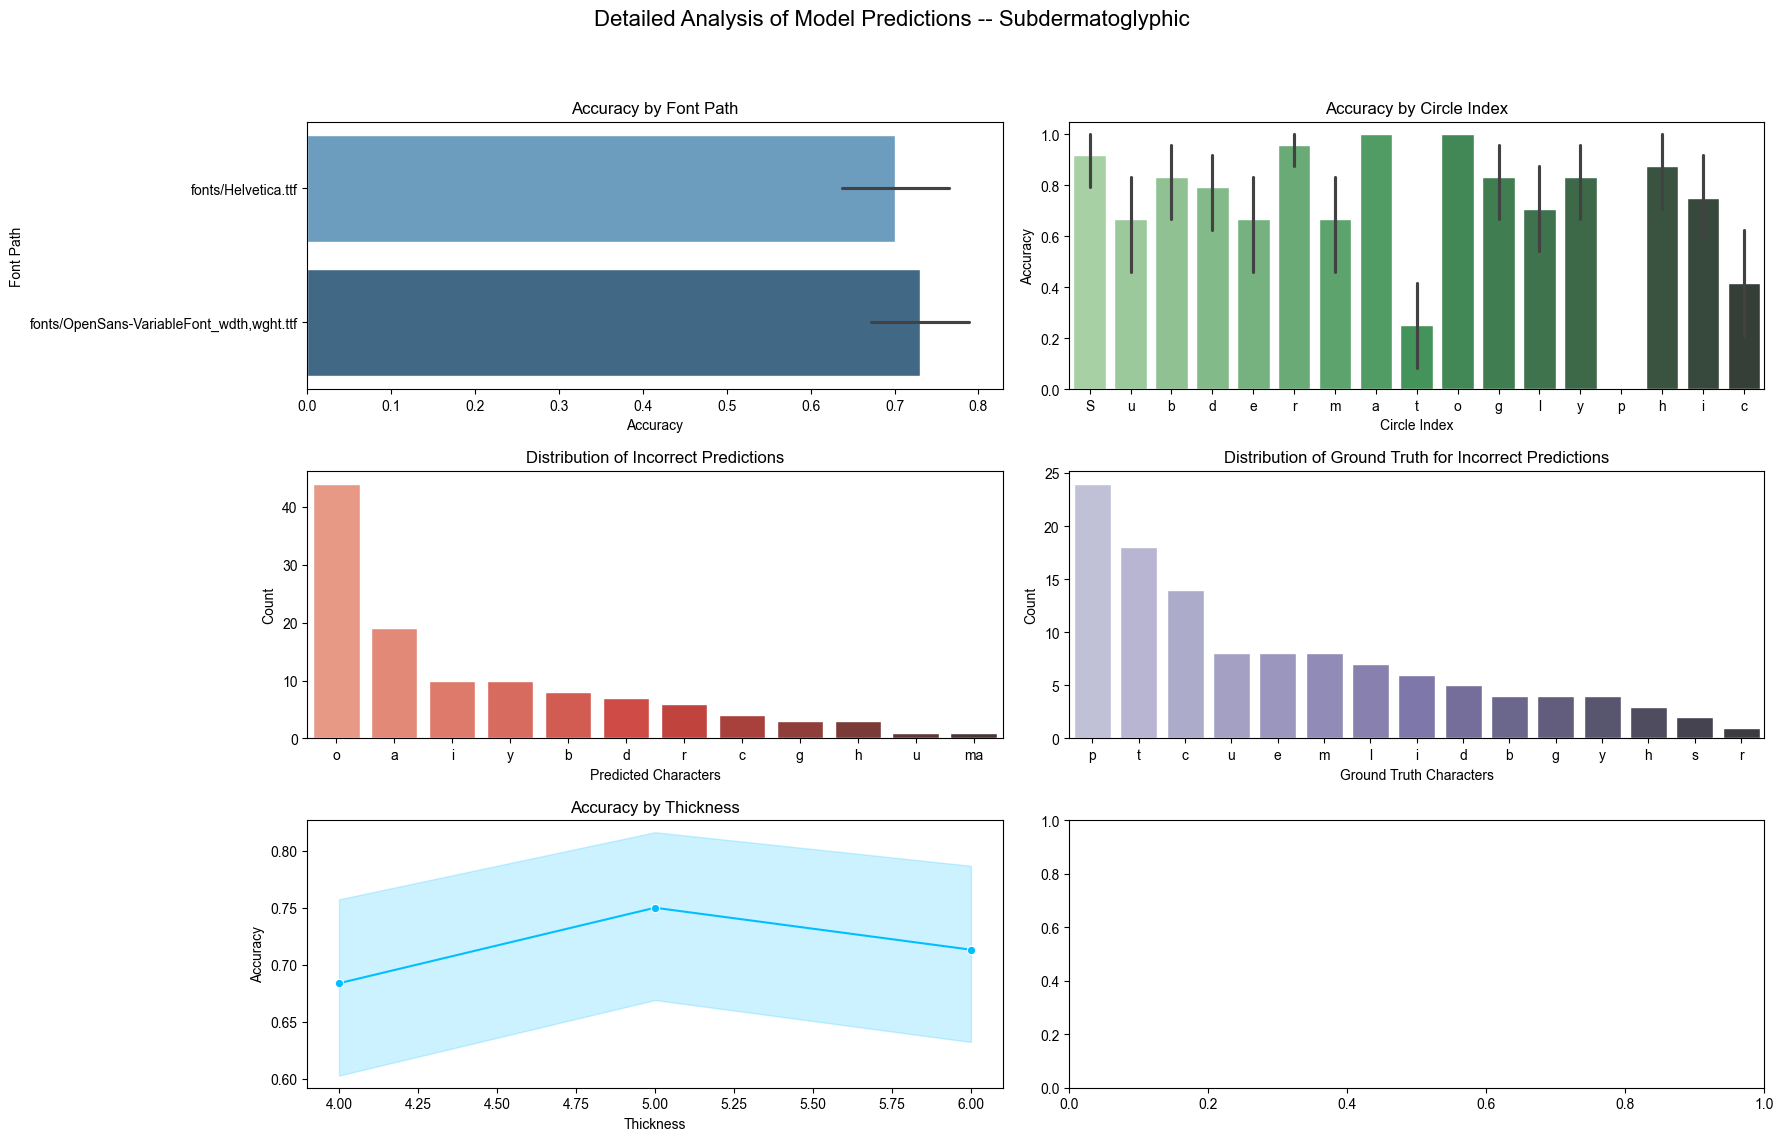

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with a more professional color palette and layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.suptitle(f"Detailed Analysis of Model Predictions -- {WORD}", fontsize=16)

# Customize the color palette
sns.set(style="whitegrid", palette="muted")

# Plot Accuracy by Font Path
sns.barplot(
    ax=axes[0, 0],
    x="is_prediction_correct",
    y="font_path",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    palette="Blues_d",
)
axes[0, 0].set_title("Accuracy by Font Path")
axes[0, 0].set_xlabel("Accuracy")
axes[0, 0].set_ylabel("Font Path")

# Plot Accuracy by Circle Index
sns.barplot(
    ax=axes[0, 1],
    x="circle_index",
    y="is_prediction_correct",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    palette="Greens_d",
)
axes[0, 1].set_title("Accuracy by Circle Index")
axes[0, 1].set_xlabel("Circle Index")
axes[0, 1].set_ylabel("Accuracy")
# Set x-axis labels to characters from the word
axes[0, 1].set_xticklabels(list("Subdermatoglyphic"))


# Plot Distribution of Incorrect Predictions
sns.countplot(
    ax=axes[1, 0],
    x="predicted",
    data=errors,
    order=errors["predicted"].value_counts().index,
    palette="Reds_d",
)
axes[1, 0].set_title("Distribution of Incorrect Predictions")
axes[1, 0].set_xlabel("Predicted Characters")
axes[1, 0].set_ylabel("Count")

# Plot Distribution of Ground Truth for Incorrect Predictions
sns.countplot(
    ax=axes[1, 1],
    x="gt",
    data=errors,
    order=errors["gt"].value_counts().index,
    palette="Purples_d",
)
axes[1, 1].set_title("Distribution of Ground Truth for Incorrect Predictions")
axes[1, 1].set_xlabel("Ground Truth Characters")
axes[1, 1].set_ylabel("Count")

# Plot Accuracy by Thickness
sns.lineplot(
    ax=axes[2, 0],
    x="thickness",
    y="is_prediction_correct",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    marker="o",
    color="deepskyblue",
)
axes[2, 0].set_title("Accuracy by Thickness")
axes[2, 0].set_xlabel("Thickness")
axes[2, 0].set_ylabel("Accuracy")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit into figure area.
plt.show()

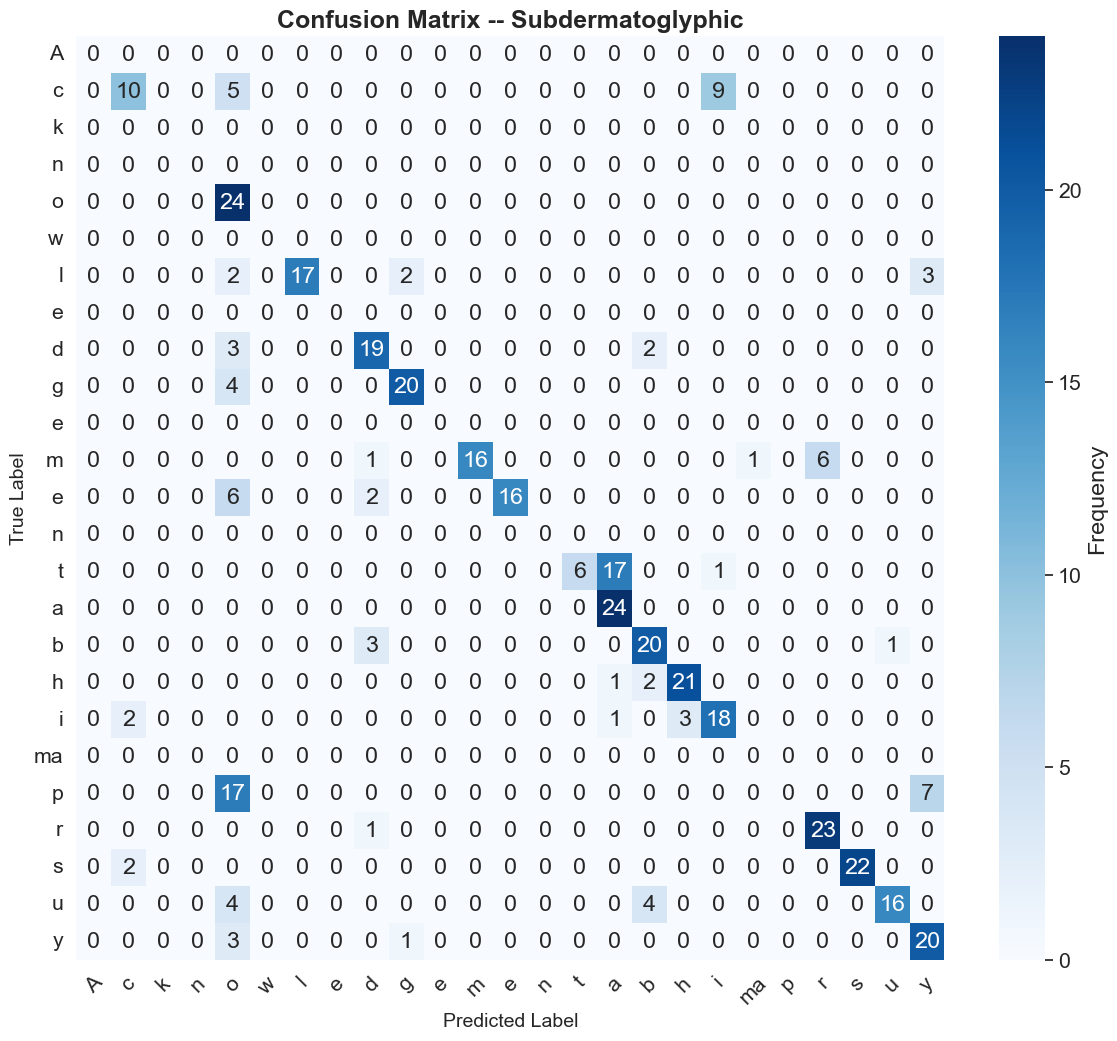

In [49]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract ground truth and predictions
ground_truth = cleaned_data["gt"]
predictions = cleaned_data["predicted"]

# Define the order of labels based on the word "Acknowledgement" and any extra characters
desired_order = list(
    "Acknowledgement"
)  # Ensure it's in lowercase if your data is in lowercase
all_labels = np.unique(np.concatenate((ground_truth, predictions)))
extra_labels = [label for label in all_labels if label not in desired_order]
final_labels = desired_order + extra_labels

# Create the confusion matrix with the specified label order
conf_matrix = confusion_matrix(ground_truth, predictions, labels=final_labels)

# Plot the confusion matrix with a more professional appearance
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.4)  # Increase font size for readability
heatmap = sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=final_labels,
    yticklabels=final_labels,
    cbar_kws={"label": "Frequency"},
)
plt.title(f"Confusion Matrix -- {WORD}", fontsize=18, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Export

In [50]:
import pandas as pd
import json
import os
import re

# Define the words
WORDs = [
    "Acknowledgement",
    "Subdermatoglyphic",
    "tHyUiKaRbNqWeOpXcZvM",
]

# Initialize an empty list to store DataFrames
all_data_frames = []

# Loop through each word
for WORD in WORDs:
    gt_data = pd.read_json(f"./images/{WORD}/configurations.json")

    # Generate model output file paths and read the content if the file exists
    gt_data["model-output-file"] = gt_data["image_path"].apply(
        lambda x: x.replace(".png", "") + "-claude-3-sonnet-20240229-output.md"
    )
    gt_data["model-output-raw"] = gt_data["model-output-file"].apply(
        lambda x: (open(x, "r").read() if os.path.exists(x) else None)
    )

    # Drop rows with missing sonnet output
    gt_data = gt_data.dropna(subset=["model-output-raw"])

    gt_data["predicted"] = gt_data["model-output-raw"].apply(extract_marked_text)
    print(gt_data["predicted"].value_counts())

    # Calculate ground truth and correctness
    gt_data["gt"] = gt_data.apply(
        lambda row: row["word"][row["circle_index"]].lower(), axis=1
    )
    gt_data["is_prediction_correct"] = gt_data["gt"] == gt_data["predicted"]
    gt_data["word_label"] = WORD  # Add a column to identify the word

    # Append to the list
    all_data_frames.append(gt_data)

# Concatenate all DataFrames into one
final_data_frame = pd.concat(all_data_frames, ignore_index=True)

predicted
e                                                                                                 93
o                                                                                                 37
c                                                                                                 27
g                                                                                                 27
n                                                                                                 26
w                                                                                                 26
d                                                                                                 25
k                                                                                                 23
a                                                                                                 22
t                                                                                

In [51]:
final_data_frame["Model"] = ["Sonnet"] * len(final_data_frame)

In [52]:
final_data_frame.to_pickle("./data/Sonnet.pkl")

In [53]:
final_data_frame

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,final_width,final_height,image_path,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,512,512,./images/Acknowledgement/text_image_2445b2a9-98bf-4178-9188-1505d9fc9916.png,./images/Acknowledgement/text_image_2445b2a9-98bf-4178-9188-1505d9fc9916-claude-3-sonnet-20240229-output.md,"The letter ""A"" is being circled in the word ""Acknowledgement"".",a,a,True,Acknowledgement,Sonnet
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,512,512,./images/Acknowledgement/text_image_3bac479b-38ae-467f-82b3-36ec1c1dd97b.png,./images/Acknowledgement/text_image_3bac479b-38ae-467f-82b3-36ec1c1dd97b-claude-3-sonnet-20240229-output.md,"The letter being circled in the image is 'A' within the word ""Acknowledgement"".",a,a,True,Acknowledgement,Sonnet
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,512,512,./images/Acknowledgement/text_image_7ddbe27c-55a2-47bb-8a5d-19e7b0ecc07f.png,./images/Acknowledgement/text_image_7ddbe27c-55a2-47bb-8a5d-19e7b0ecc07f-claude-3-sonnet-20240229-output.md,"The letter being circled in the word ""Acknowledgement"" is the letter A.",a,a,True,Acknowledgement,Sonnet
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,512,512,./images/Acknowledgement/text_image_f22668e3-c42e-446c-8d38-944f5b7bc6fc.png,./images/Acknowledgement/text_image_f22668e3-c42e-446c-8d38-944f5b7bc6fc-claude-3-sonnet-20240229-output.md,"The letter 'A' is being circled in the word ""Acknowledgement"".",a,a,True,Acknowledgement,Sonnet
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,512,512,./images/Acknowledgement/text_image_4181a30f-30bd-48cf-931d-80524b6f30d9.png,./images/Acknowledgement/text_image_4181a30f-30bd-48cf-931d-80524b6f30d9-claude-3-sonnet-20240229-output.md,"The letter being circled in the word ""Acknowledgement"" is the letter A.",a,a,True,Acknowledgement,Sonnet
5,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,50,0,0,10,2,512,512,./images/Acknowledgement/text_image_8bf9b05b-4ecd-4124-973e-9f76c8666b59.png,./images/Acknowledgement/text_image_8bf9b05b-4ecd-4124-973e-9f76c8666b59-claude-3-sonnet-20240229-output.md,"The letter being circled in the image is the letter ""A"" in the word ""Acknowledgement"".",a,a,True,Acknowledgement,Sonnet
6,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,100,0,0,10,2,512,512,./images/Acknowledgement/text_image_12f7eb01-cb4f-4804-8e6d-c1ce93930d0e.png,./images/Acknowledgement/text_image_12f7eb01-cb4f-4804-8e6d-c1ce93930d0e-claude-3-sonnet-20240229-output.md,"The letter 'A' is being circled in the word ""Acknowledgement"".",a,a,True,Acknowledgement,Sonnet
7,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,200,0,0,10,2,512,512,./images/Acknowledgement/text_image_535e5769-9faf-4386-8b03-8bcbfc6fb7d1.png,./images/Acknowledgement/text_image_535e5769-9faf-4386-8b03-8bcbfc6fb7d1-claude-3-sonnet-20240229-output.md,"The letter ""A"" is being circled in the word ""Acknowledgement"".",a,a,True,Acknowledgement,Sonnet
8,Acknowledgement,fonts/Helvetica.ttf,0,6,1.4,25,0,0,10,2,512,512,./images/Acknowledgement/text_image_46358c75-9d27-4f7d-a36c-19f0133083b6.png,./images/Acknowledgement/text_image_46358c75-9d27-4f7d-a36c-19f0133083b6-claude-3-sonnet-20240229-output.md,"The letter ""A"" is being circled in the word ""Acknowledgement"".",a,a,True,Acknowledgement,Sonnet
9,Acknowledgement,fonts/Helvetica.ttf,0,6,1.4,50,0,0,10,2,512,512,./images/Acknowledgement/text_image_1785ada1-9155-496c-ad38-ca9cc1bab5bc.png,./images/Acknowledgement/text_image_1785ada1-9155-496c-ad38-ca9cc1bab5bc-claude-3-sonnet-20240229-output.md,"In the image, the letter ""A"" is circled or enclosed within a red circle or oval shape at the beginning of the word ""Acknowledgement"".",a,a,True,Acknowledgement,Sonnet
